<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/03_Regresi%C3%B3n_Lineal/RL_con_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL con Pytorch

Si bien esta librería (al igual que Tensorflow) no tiene mucho sentido usarla para RL porque es una librería más típica de DeepLearning, puede tener sentido presentarla en este ejemplo sencillo como introducción. 

In [1]:
from sklearn import datasets
import numpy as np

import torch

Tomamos los mismos datos del dataset de Boston que usamos para la regresión simple. 

In [2]:
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
X = boston.data[:, np.newaxis, 5]
y = boston.target

Pytorch trabaja directamente sobre tensores. Veamos un poco que es un tensor y como lo trabaja Pytorch

In [4]:
torch.__version__

'1.10.0+cu111'

In [16]:
# empty genera un tensor vacío
tensor=torch.empty(2,2)

In [17]:
# Rand genera un tensor aleatorio
tensor=torch.rand(2,2)

In [18]:
tensor

tensor([[0.2486, 0.6910],
        [0.3756, 0.6126]])

In [19]:
# Fíjense que si suman un número a un tensor, se suma elemento a elemento como si el número fuera un tensor del mismo tamaño
tensor+1

tensor([[1.2486, 1.6910],
        [1.3756, 1.6126]])

In [20]:
# Se genera la multiplicación elemento a elemento (y no la multiplicación matricial)
tensor*tensor

tensor([[0.0618, 0.4774],
        [0.1411, 0.3753]])

In [14]:
# Mean devuelve la media de todos los elementos del tensor
tensor.mean()

tensor(0.5233)

Definimos una clase para regresión lineal, que hereda torch.nn.Module, que es el módulo básico de la red neuronal que contiene todas las funciones requeridas. Nuestro modelo de regresión lineal solo contiene una función lineal simple.

In [7]:
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.001 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [9]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [10]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X).cuda()).to(torch.float)
        labels = Variable(torch.from_numpy(y).cuda()).to(torch.float)
    else:
        inputs = Variable(torch.from_numpy(X)).to(torch.float)
        labels = Variable(torch.from_numpy(y)).to(torch.float)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(590.3024, grad_fn=<MseLossBackward0>)
epoch 0, loss 590.3023681640625
tensor(511.7299, grad_fn=<MseLossBackward0>)
epoch 1, loss 511.7298583984375
tensor(445.5084, grad_fn=<MseLossBackward0>)
epoch 2, loss 445.5084228515625
tensor(389.6965, grad_fn=<MseLossBackward0>)
epoch 3, loss 389.69647216796875
tensor(342.6577, grad_fn=<MseLossBackward0>)
epoch 4, loss 342.6576843261719
tensor(303.0130, grad_fn=<MseLossBackward0>)
epoch 5, loss 303.01300048828125
tensor(269.6002, grad_fn=<MseLossBackward0>)
epoch 6, loss 269.60015869140625
tensor(241.4395, grad_fn=<MseLossBackward0>)
epoch 7, loss 241.4394989013672
tensor(217.7054, grad_fn=<MseLossBackward0>)
epoch 8, loss 217.7054443359375
tensor(197.7021, grad_fn=<MseLossBackward0>)
epoch 9, loss 197.70213317871094
tensor(180.8432, grad_fn=<MseLossBackward0>)
epoch 10, loss 180.84317016601562
tensor(166.6343, grad_fn=<MseLossBackward0>)
epoch 11, loss 166.63426208496094
tensor(154.6589, grad_fn=<MseLossBackward0>)
epoch 12, loss 154.6588

Vemos en el gráfico que la recta no termina de ajustar bien a los datos. Probablemente porque no terminó de entrenar.

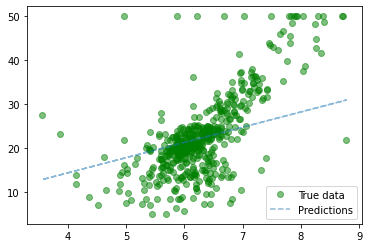

In [11]:
from matplotlib import pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(X).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(X).to(torch.float))).data.numpy()
    #print(predicted)

plt.clf()
plt.plot(X, y, 'go', label='True data', alpha=0.5)
plt.plot(X, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()